<a href="https://colab.research.google.com/github/alicevadney/CS3/blob/main/Example_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script is a full run through of the case study code expectations with the addition of some EDA for visualization purposes.

# Set Up

In [2]:
! git clone https://github.com/alicevadney/CS3

Cloning into 'CS3'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 5.82 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/CS3/DATA/Restaurant Reviews.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


# EDA (optional)

This section includes exploratory data analysis to orient the user to the dataset. This is not required for the case study.

In [7]:
# dimensions
print(df.shape,'\n')
# observations
print(df.dtypes, '\n')
# variables
print(df.columns,'\n')

(2566, 7) 

Date               object
Rating            float64
Message            object
Author Reviews    float64
Restaurant         object
sentiment         float64
DayOfWeek          object
dtype: object 

Index(['Date', 'Rating', 'Message', 'Author Reviews', 'Restaurant',
       'sentiment', 'DayOfWeek'],
      dtype='object') 



In [8]:
# rating
var = 'Rating'
print(df[var].value_counts(), '\n')
print(df[var].describe(), '\n')

Rating
5.0    1401
4.0     579
3.0     259
2.0     162
1.0     153
Name: count, dtype: int64 

count    2554.000000
mean        4.140564
std         1.193161
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64 



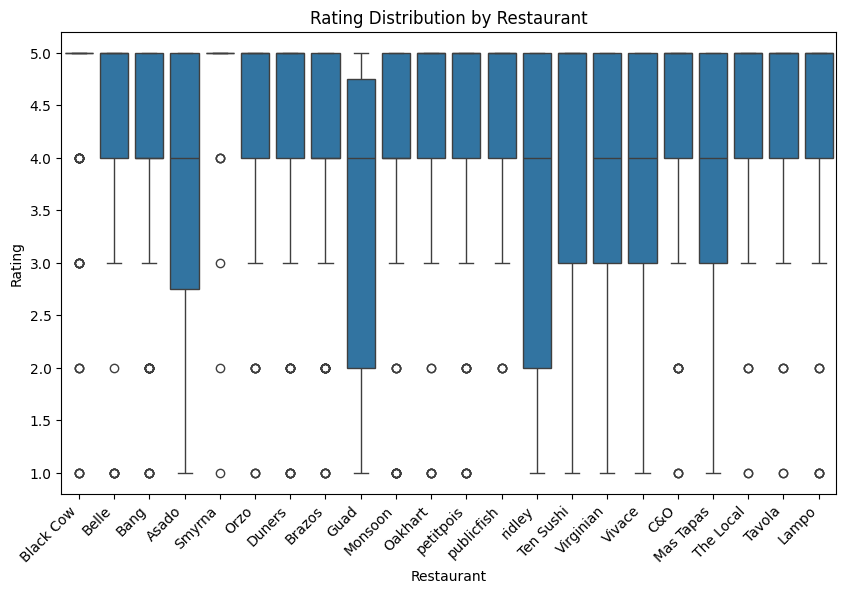

In [10]:
# rating by restaurant
df = df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Restaurant', y='Rating', data=df)
plt.title('Rating Distribution by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Tables of Sentiment and Rating by Restaurant

In [18]:
from IPython.display import display_html

In [19]:
# average rating
avg_rating_by_restaurant = df.groupby(df['Restaurant'])['Rating'].mean().sort_values(ascending=False)

# average sentiment
avg_sentiment_by_restaurant = df.groupby(df['Restaurant'])['sentiment'].mean().sort_values(ascending=False)

# convert to HTML
html1 = avg_rating_by_restaurant.to_frame().to_html()
html2 = avg_sentiment_by_restaurant.to_frame().to_html()

#  display side-by-side
html_side_by_side = f"""
<div style="display: flex; gap: 40px;">
    <div>{html1}</div>
    <div>{html2}</div>
</div>
"""

display_html(html_side_by_side, raw=True)

,Rating
Restaurant,
Smyrna,4.848101
publicfish,4.591667
Oakhart,4.541667
Black Cow,4.494845
Lampo,4.491667
Tavola,4.366667
Orzo,4.366667
The Local,4.366667
C&O,4.333333


# Regression

This section contains the code for the OLS regression between sentiment and rating.

In [11]:
import statsmodels.api as sm

In [12]:
# regression analysis
avg_rating_by_restaurant = df.groupby(df['Restaurant'])['Rating'].mean()
avg_sentiment_by_restaurant = df.groupby(df['Restaurant'])['sentiment'].mean()
avg_df = pd.concat([avg_rating_by_restaurant, avg_sentiment_by_restaurant], axis=1)
avg_df.columns = ['avg_rating', 'avg_sentiment']

x = avg_df['avg_sentiment'].values.reshape(-1, 1)
y = avg_df['avg_rating'].values.reshape(-1, 1)

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

beta0 = model.params[0]
beta1 = model.params[1]
yhat = beta0 + beta1 * x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     69.77
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           5.95e-08
Time:                        14:09:22   Log-Likelihood:                 6.8484
No. Observations:                  22   AIC:                            -9.697
Df Residuals:                      20   BIC:                            -7.515
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4670      0.323      4.536      0.0

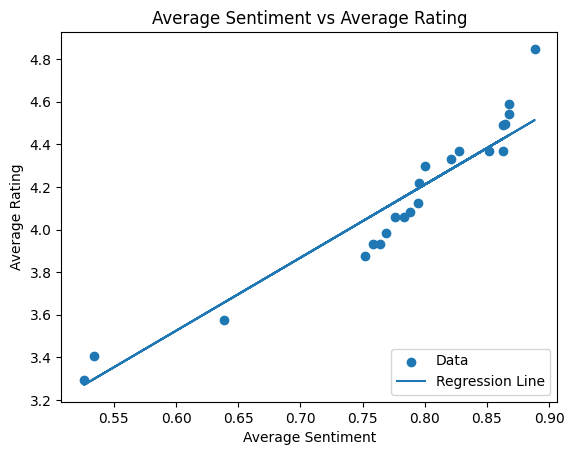

In [20]:
# regression plot
plt.scatter(avg_sentiment_by_restaurant, avg_rating_by_restaurant, label='Data')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Rating')
plt.title('Average Sentiment vs Average Rating')
plt.plot(x,yhat,label='Regression Line')
plt.legend(loc='lower right')
plt.show()